<a href="https://colab.research.google.com/github/aloy4646/students-grade-classification/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif
from tabulate import tabulate
from imblearn.over_sampling import BorderlineSMOTE

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/tubesML/student-por.csv')
dataset.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


<h3> Insight : </h3>
    Banyak dari fitur-fitur diatas ini penting karena mereka memiliki kemungkinan yang tinggi untuk memberikan dampak pada performa akademis. Sebagai contoh, konsumsi alkohol dalam jumlah banyak dapat memberikan efek negatif pada fungi koginitf manusia, tetapi kebalikannya waktu yang dihabiskan untuk belajar dapat memberikan dampak yang positif. Edukasi orangtua dan status ekonomi juga menentukkan akses pelajar pada sumber daya yang bisa membantu mereka sukses secara akademik. Sementara absen dari kelas bisa menyebabkan pelajar kehilangan informasi yang penting. Usia dan gender juga mempengaruhi performa akademik.

<h3> Penjelasan Fitur</h3>

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
sex - student's sex (binary: 'F' - female or 'M' - male)<br>
age - student's age (numeric: from 15 to 22)<br>
address - student's home address type (binary: 'U' - urban or 'R' - rural)<br>
famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)<br>
Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)<br>
Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)<br>
Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')<br>
reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')<br>
guardian - student's guardian (nominal: 'mother', 'father' or 'other')<br>
traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
failures - number of past class failures (numeric: n if 1<=n<3, else 4)<br>
schoolsup - extra educational support (binary: yes or no)<br>
famsup - family educational support (binary: yes or no)<br>
paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)<br>
activities - extra-curricular activities (binary: yes or no)<br>
nursery - attended nursery school (binary: yes or no)<br>
higher - wants to take higher education (binary: yes or no)<br>
internet - Internet access at home (binary: yes or no)<br>
romantic - with a romantic relationship (binary: yes or no)<br>
famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)<br>
freetime - free time after school (numeric: from 1 - very low to 5 - very high)<br>
goout - going out with friends (numeric: from 1 - very low to 5 - very high)<br>
Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
health - current health status (numeric: from 1 - very bad to 5 - very good)<br>
absences - number of school absences (numeric: from 0 to 93)
<br>
G1 - first period grade (numeric: from 0 to 19)
<br>
G2 - second period grade (numeric: from 0 to 19)
<br>
G3 - final grade (numeric: from 0 to 19)

## Data cleaning

### Memisahkan kolom numerical dan categorical

In [ ]:
numeric_cols = dataset.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = dataset.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


### Mengisi data yang kosong

In [ ]:
dataset_NoNull = dataset.copy()
med = dataset_NoNull[numeric_cols].median()
dataset_NoNull[numeric_cols] = dataset_NoNull[numeric_cols].fillna(med)

most_freq = dataset_NoNull[non_numeric_cols].describe().loc['top']
dataset_NoNull[non_numeric_cols] = dataset_NoNull[non_numeric_cols].fillna(most_freq)
print(dataset_NoNull.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

### Mengecek adanya data duplikat

In [ ]:
dataset_NoDuplicat = dataset_NoNull.copy()
dataset_NoDuplicat.duplicated().sum()

0

### Mengecek adanya outliers dengan kurtosis

In [ ]:
dataset_NoDuplicat.kurt(numeric_only=True)[:10]

age           0.071509
Medu         -1.260619
Fedu         -1.109241
traveltime    1.108865
studytime     0.037846
failures      9.824409
famrel        1.348973
freetime     -0.396959
goout        -0.865454
Dalc          4.349297
dtype: float64

Karena tidak ada fitur dengan nilai kurtosis yang cukup tinggi untuk dihilangkan nilai outliersnya. <br>
Dan juga karena kita akan melakukan standarisasi maka tidak perlu menghapus outliers karena standarisasi tidak terlalu sensitif terhadap outliers.

## Normalisasi Data

### Rubah semua fitur menjadi numerical (Feature Transformation)

Semua fitur categorical dirubah menjadi fitur numerical supaya bisa dilakukan normalisasi data

In [ ]:
dataset_Numerical = dataset_NoDuplicat.copy()

dataset_Numerical = pd.get_dummies(dataset_Numerical, columns=['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], drop_first=True)

In [ ]:
dataset_Numerical.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,1,0,0,0,1,1,0,0
1,17,1,1,1,2,0,5,3,3,1,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,1,0,0,0,1,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,1,0,0,1,0,1,1,1,1,1
4,16,3,3,1,2,0,4,3,2,1,...,0,0,0,1,0,0,1,1,0,0
5,16,4,3,1,2,0,5,4,2,1,...,1,0,0,1,0,1,1,1,1,0
6,16,2,2,1,2,0,4,4,4,1,...,1,0,0,0,0,0,1,1,1,0
7,17,4,4,2,2,0,4,1,4,1,...,1,0,1,1,0,0,1,1,0,0
8,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,0,1,1,1,0
9,15,3,4,1,2,0,5,5,1,1,...,1,0,0,1,0,1,1,1,1,0


In [ ]:
dataset_Numerical.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_MS            uint8
sex_M                uint8
address_U            uint8
famsize_LE3          uint8
Pstatus_T            uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_home          uint8
reason_other         uint8
reason_reputation    uint8
guardian_mother      uint8
guardian_other       uint8
schoolsup_yes        uint8
famsup_yes           uint8
paid_yes             uint8
a

### Menghitung normalisasi

In [ ]:
dataset_Numerical.select_dtypes(include=['number']).columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')

In [ ]:
samples = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 
       'school_MS', 'sex_M', 'address_U', 'famsize_LE3', 'Pstatus_T',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes']

target = ['G3']

dataset_Normalisasi = dataset_Numerical.copy()
dataset_Normalisasi[samples] = (dataset_Normalisasi[samples] - dataset_Normalisasi[samples].mean()) / dataset_Normalisasi[samples].std()
dataset_Normalisasi.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.030900,1.309206,1.539528,0.576274,0.083588,-0.374017,0.072550,-0.171514,0.693250,-0.543136,...,0.652470,-0.259481,2.920779,-1.258258,-0.252658,-0.970392,0.495281,0.344648,-1.814644,-0.762908
1,0.209975,-1.335010,-1.187916,-0.759446,0.083588,-0.374017,1.118885,-0.171514,-0.157259,-0.543136,...,-1.530277,-0.259481,-0.341847,0.793525,-0.252658,-0.970392,-2.015947,0.344648,0.550223,-0.762908
2,-1.431876,-1.335010,-1.187916,-0.759446,0.083588,-0.374017,0.072550,-0.171514,-1.007768,0.538138,...,0.652470,-0.259481,2.920779,-1.258258,-0.252658,-0.970392,0.495281,0.344648,0.550223,-0.762908
3,-1.431876,1.309206,-0.278768,-0.759446,1.289120,-0.374017,-0.973785,-1.122905,-1.007768,-0.543136,...,0.652470,-0.259481,-0.341847,0.793525,-0.252658,1.028924,0.495281,0.344648,0.550223,1.308754
4,-0.610951,0.427801,0.630380,-0.759446,0.083588,-0.374017,0.072550,-0.171514,-1.007768,-0.543136,...,-1.530277,-0.259481,-0.341847,0.793525,-0.252658,-0.970392,0.495281,0.344648,-1.814644,-0.762908
5,-0.610951,1.309206,0.630380,-0.759446,0.083588,-0.374017,1.118885,0.779877,-1.007768,-0.543136,...,0.652470,-0.259481,-0.341847,0.793525,-0.252658,1.028924,0.495281,0.344648,0.550223,-0.762908
6,-0.610951,-0.453605,-0.278768,-0.759446,0.083588,-0.374017,0.072550,0.779877,0.693250,-0.543136,...,0.652470,-0.259481,-0.341847,-1.258258,-0.252658,-0.970392,0.495281,0.344648,0.550223,-0.762908
7,0.209975,1.309206,1.539528,0.576274,0.083588,-0.374017,0.072550,-2.074296,0.693250,-0.543136,...,0.652470,-0.259481,2.920779,0.793525,-0.252658,-0.970392,0.495281,0.344648,-1.814644,-0.762908
8,-1.431876,0.427801,-0.278768,-0.759446,0.083588,-0.374017,0.072550,-1.122905,-1.007768,-0.543136,...,0.652470,-0.259481,-0.341847,0.793525,-0.252658,-0.970392,0.495281,0.344648,0.550223,-0.762908
9,-1.431876,0.427801,1.539528,-0.759446,0.083588,-0.374017,1.118885,1.731268,-1.858278,-0.543136,...,0.652470,-0.259481,-0.341847,0.793525,-0.252658,1.028924,0.495281,0.344648,0.550223,-0.762908


## Feature Selection

### Memilih Feature berdasarkan Information Gain

Fitur yang memiliki nilai mendekati 1 berarti fitur tersebut lebih berpengaruh pada fitur target.

In [ ]:
# Split dataset menjadi X (sample) dan y (target)
X = dataset_Normalisasi.drop(columns=['G3'])
y = dataset_Normalisasi['G3']

# Menghitung information gain
ig_scores = mutual_info_classif(X, y)

# Membuat dictionary untuk menempatkan nama fitur ke information gain
ig_dict = dict(zip(X.columns, ig_scores))

for feature, score in sorted(ig_dict.items(), key=lambda x: x[1], reverse=True):
    print(feature, score)

G2 1.2183629173602517
G1 0.7920448265654443
failures 0.16827470377042708
higher_yes 0.09823187894348662
schoolsup_yes 0.09795545802637884
address_U 0.08967965775925313
age 0.062463316784784784
Fjob_teacher 0.05344610979131614
reason_reputation 0.04886613677425622
Medu 0.04106010143684813
school_MS 0.04054894007970944
romantic_yes 0.03436873093618198
guardian_other 0.03131516055884287
absences 0.031214358348925497
traveltime 0.028094667968714848
reason_other 0.025007360734884188
Mjob_health 0.021598152219843403
famrel 0.020618247254630795
goout 0.020190329906050408
health 0.01955511708357749
sex_M 0.017697419720601015
Dalc 0.01767958044627882
Walc 0.016720156223261284
Mjob_services 0.013050452168841264
studytime 0.010574455966700036
Pstatus_T 0.01005967062811619
guardian_mother 0.008972804636128817
nursery_yes 0.006186717365566974
Mjob_other 0.005771603549261872
paid_yes 0.003360292745111959
Fjob_services 0.0012629413865039574
Fedu 0.0
freetime 0.0
famsize_LE3 0.0
Mjob_teacher 0.0
Fjob_

### Memilih fitur berdasarkan korelasi fitur dengan target menggunakan metode Correlation-based Feature Selection (CFS)



Fitur yang memiliki nilai korelasi mendekati 1 atau -1 berarti lebih berpengaruh pada nilai fitur target

In [ ]:
corr_matrix = dataset_Normalisasi.corrwith(dataset_Normalisasi['G3'])
corr_matrix_sorted = sorted(corr_matrix.items(), key=lambda x: x[1], reverse=True)


table = []
for row in corr_matrix_sorted:
    table.append([row[0], row[1]])

print(tabulate(table, headers=['Variable', 'Correlation Coefficient']))

Variable             Correlation Coefficient
-----------------  -------------------------
G3                               1
G2                               0.918548
G1                               0.826387
higher_yes                       0.332172
studytime                        0.249789
Medu                             0.240151
Fedu                             0.2118
reason_reputation                0.170944
address_U                        0.167637
internet_yes                     0.150025
Mjob_teacher                     0.13491
Fjob_teacher                     0.125916
Mjob_health                      0.101244
famrel                           0.0633611
activities_yes                   0.0597915
famsup_yes                       0.0592056
reason_home                      0.046537
famsize_LE3                      0.0450164
Fjob_health                      0.039142
Mjob_services                    0.0384469
nursery_yes                      0.0287524
Pstatus_T                       

### Pilih Fitur

In [ ]:
high_corr_vars = ['higher_yes', 'school_MS', 'studytime', 'Medu', 'Fedu', 'reason_reputation', 'address_U', 'internet_yes', 'Mjob_teacher', 'sex_M', 'Fjob_teacher', 'Mjob_health', 'romantic_yes','G3']
dataset_FeaturesSelected = dataset_Normalisasi[high_corr_vars]
dataset_FeaturesSelected.head(10)

,higher_yes,school_MS,studytime,Medu,Fedu,reason_reputation,address_U,internet_yes,Mjob_teacher,sex_M,Fjob_teacher,Mjob_health,romantic_yes,G3
0,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,11
1,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,11
2,0.344648,-0.730381,0.083588,-1.335010,-1.187916,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,12
3,0.344648,-0.730381,1.289120,1.309206,-0.278768,-0.53120,0.659674,0.550223,-0.352975,-0.832735,-0.242151,3.535752,1.308754,14
4,0.344648,-0.730381,0.083588,0.427801,0.630380,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,-0.242151,-0.282389,-0.762908,13
5,0.344648,-0.730381,0.083588,1.309206,0.630380,1.87963,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
6,0.344648,-0.730381,0.083588,-0.453605,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13
7,0.344648,-0.730381,0.083588,1.309206,1.539528,-0.53120,0.659674,-1.814644,-0.352975,-0.832735,4.123292,-0.282389,-0.762908,13
8,0.344648,-0.730381,0.083588,0.427801,-0.278768,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,17
9,0.344648,-0.730381,0.083588,0.427801,1.539528,-0.53120,0.659674,0.550223,-0.352975,1.199013,-0.242151,-0.282389,-0.762908,13


## Cek apakah terjadi imbalance

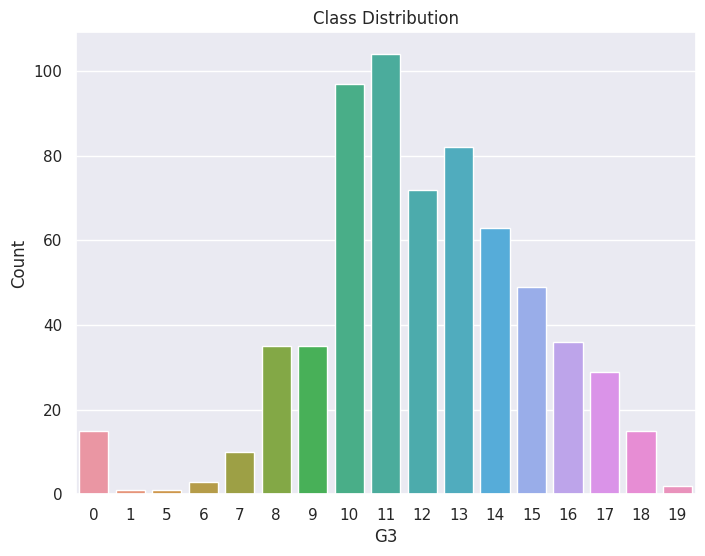

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

ax = sns.countplot(x='G3', data=dataset_FeaturesSelected)

plt.title('Class Distribution')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()
# plt.savefig("/content/drive/MyDrive/tubesML/imbalance.png")

Terjadi class imbalance pada dataset tersebut.

1 dan 5 dihapus karena nilainya terlalu kecil dan tidak bisa di over sampling (error saat di over sampling menggunakan SMOTE)

In [ ]:
dataset_Imbalance = dataset_FeaturesSelected.copy()
dataset_Imbalance = dataset_Imbalance.drop(dataset_Imbalance[dataset_Imbalance['G3'] == 1].index)
dataset_Imbalance = dataset_Imbalance.drop(dataset_Imbalance[dataset_Imbalance['G3'] == 5].index)

In [ ]:
X = dataset_Imbalance.drop('G3', axis=1)
y = dataset_Imbalance['G3']

In [ ]:
bsmote = BorderlineSMOTE(sampling_strategy='auto', k_neighbors=2, random_state=42)
X_resampled, y_resampled = bsmote.fit_resample(X, y)

In [ ]:
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['G3'])
dataset_Balanced = pd.concat([X_resampled_df, y_resampled_df], axis=1)

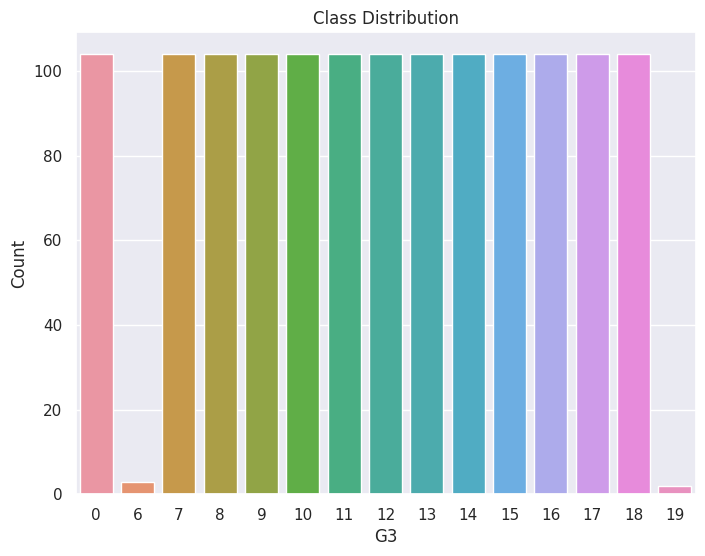

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

ax = sns.countplot(x='G3', data=dataset_Balanced)

plt.title('Class Distribution')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

class 6 dan 19 dihapus karena masih imbalance

In [ ]:
dataset_Balanced = dataset_Balanced.drop(dataset_Balanced[dataset_Balanced['G3'] == 6].index)
dataset_Balanced = dataset_Balanced.drop(dataset_Balanced[dataset_Balanced['G3'] == 19].index)

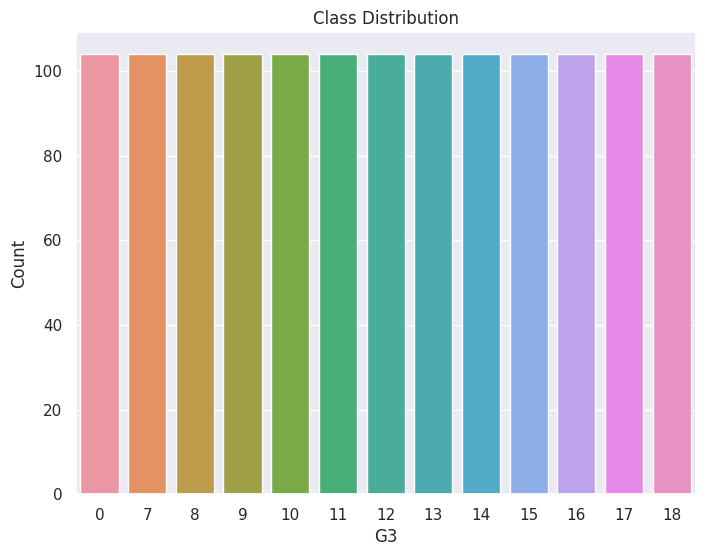

In [ ]:
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))

ax = sns.countplot(x='G3', data=dataset_Balanced)

plt.title('Class Distribution')
plt.xlabel('G3')
plt.ylabel('Count')
plt.show()

In [ ]:
# simpan data yang sudah dipreprocessing ke CSV baru
dataset_Balanced.to_csv('/content/drive/MyDrive/tubesML/student-por-preprocessed.csv', index=False)